In [101]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
cardioData = pd.read_csv('test.csv').drop('age', axis=1)
#cardioData = pd.read_csv('cardio.csv').drop('id', axis=1)

cardioData.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,year,cardio_bool
0,1,158,65.0,140,70,2,1,0,0,1,1,26.037494,56,Y
1,1,160,57.0,110,70,1,1,0,0,0,0,22.265625,54,N
2,2,167,75.0,140,80,1,1,0,0,1,1,26.892323,58,Y
3,2,170,58.0,140,90,1,1,0,0,1,1,20.069204,60,Y
4,1,164,65.0,120,80,1,1,0,0,1,0,24.167162,64,N


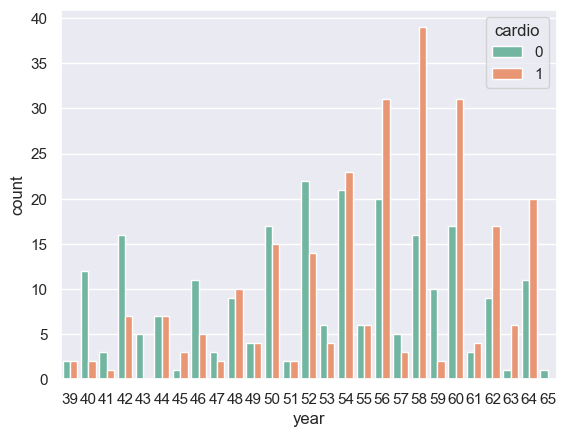

In [102]:
year = pd.DataFrame(cardioData['year'])
sb.countplot(x='year', hue='cardio', data = cardioData, palette="Set2");

<AxesSubplot: xlabel='variable', ylabel='count'>

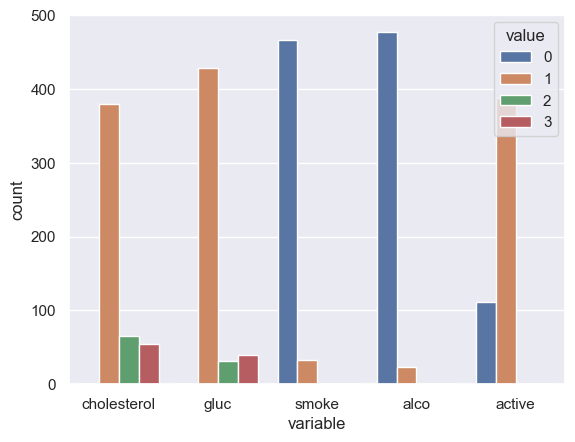

In [103]:
cardioCatData = pd.DataFrame(cardioData[['cholesterol','gluc', 'smoke', 'alco', 'active']])
sb.countplot(x="variable", hue="value", data=pd.melt(cardioCatData))

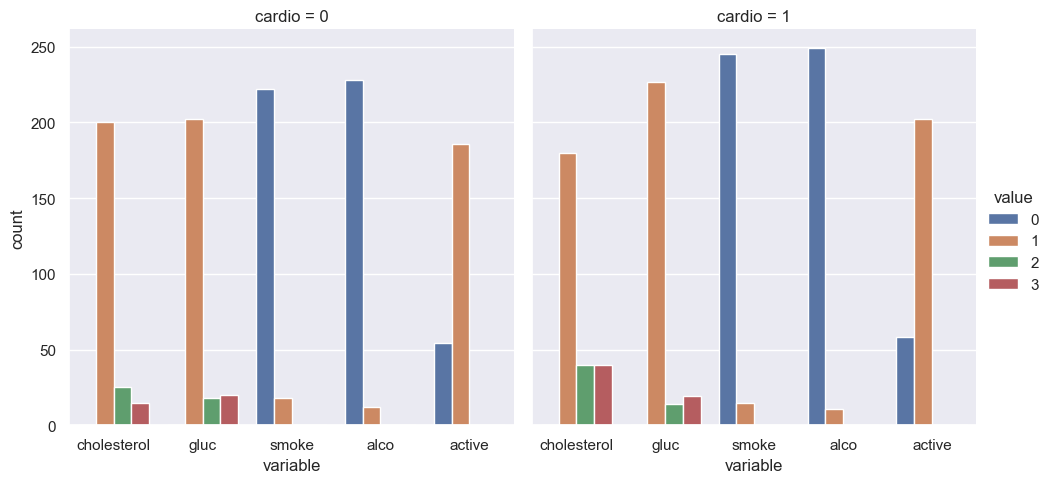

In [104]:
df_long = pd.melt(cardioData, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sb.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count");

<AxesSubplot: >

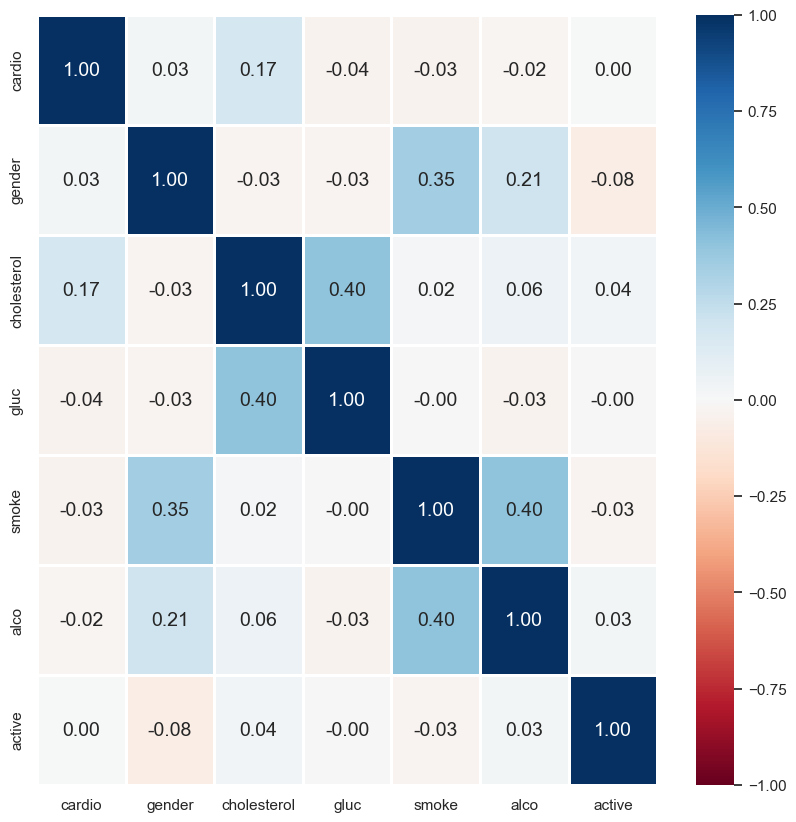

In [118]:
catData = pd.DataFrame(cardioData[['cardio','gender','cholesterol','gluc', 'smoke', 'alco', 'active']])
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(catData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

<AxesSubplot: xlabel='cardio', ylabel='active'>

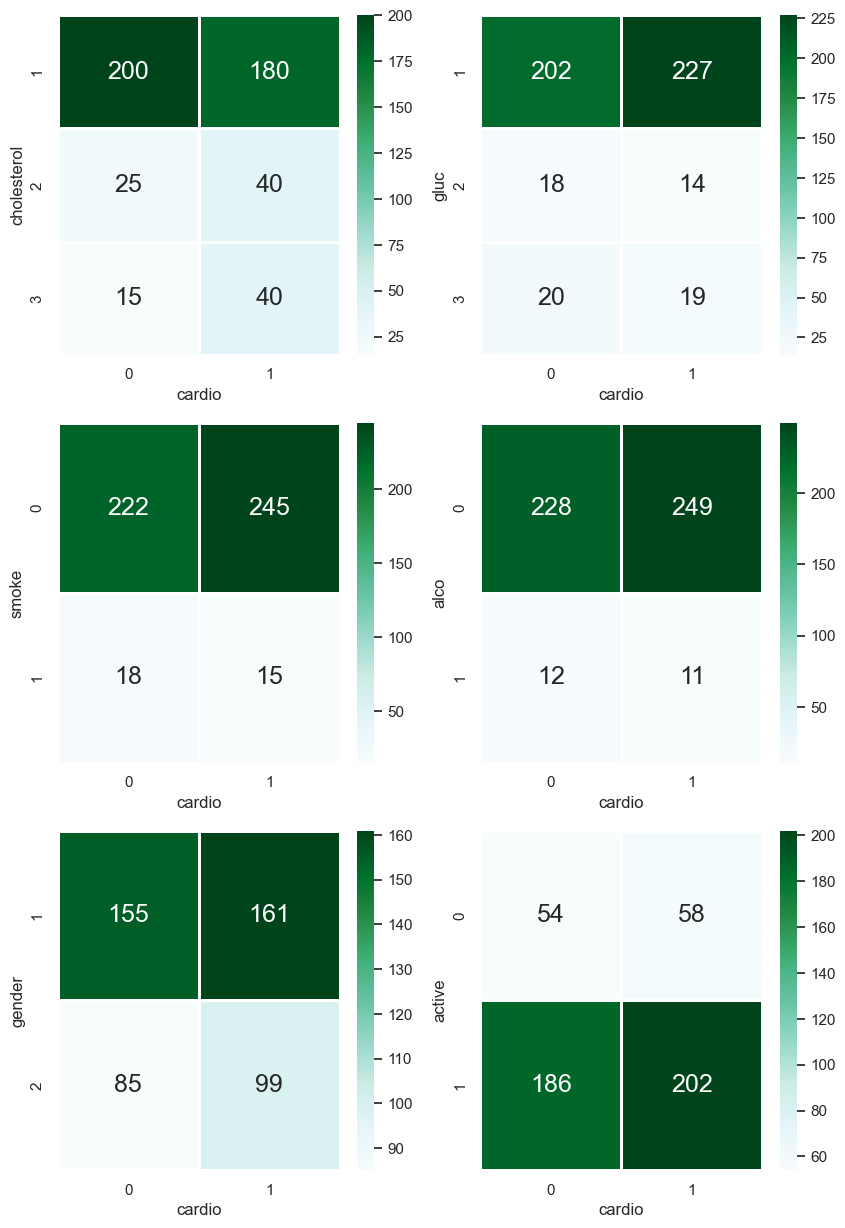

In [124]:
catData = pd.DataFrame(cardioData[['cardio','gender','cholesterol','gluc', 'smoke', 'alco', 'active']])

f, axes = plt.subplots(3, 2, figsize=(10, 15))
sb.heatmap(catData.groupby(['cholesterol', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[0,0])
sb.heatmap(catData.groupby(['gluc', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[0,1])
sb.heatmap(catData.groupby(['smoke', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[1,0])
sb.heatmap(catData.groupby(['alco', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[1,1])
sb.heatmap(catData.groupby(['gender', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[2,0])
sb.heatmap(catData.groupby(['active', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[2,1])